# Economic Dynamics ch. 5

In [2]:
#Ex 5.1.2 (Value function iteration)
const beta, rho, B, M = 0.5, 0.9, 10, 5
const S = 0:B+M
const Z = 0:B

function u(c::Int64)
    return c^beta
end

function phi(z::Int64)
    return 1.0/length(Z)
end

function gamma(x::Int64)
    return 0:min(x,M)
end

function T(v::Vector{Float64}) 
    Tv = zeros(Float64,length(S))
    for x in S
        value = zeros(length(S))
        for a in gamma(x)
            value[a+1] = u(x-a) + rho*sum([v[a+z]*phi(z) for z in 1:B+1])
        end
        Tv[x+1] = maximum(value)
    end
    return Tv
end

function solveV(v::Vector{Float64},tol::Float64=0.001)
    vnew = T(v)
    while maximum(abs(vnew-v)) > tol
        v = vnew
        vnew = T(v)
    end
    return vnew
end

function solvePolicy(v::Vector{Float64})
    sigma = zeros(Int64,length(S))
    for x in S
        value = zeros(length(S))
        for a in gamma(x)
            value[a+1] = u(x-a) + rho*sum([v[a+z]*phi(z) for z in 1:B+1])
        end
        sigma[x+1] = indmax(value)
    end
    return sigma-1
end


start = [u(c) for c in 1:length(S)]

sig_v_iter = solvePolicy(solveV(start))


16-element Array{Int64,1}:
 0
 0
 0
 0
 1
 1
 1
 2
 2
 3
 3
 4
 5
 5
 5
 5

In [18]:
#Ex 5.1.3 (requires Ex 5.1.2)
p = zeros(Float64,length(S),length(S))
for x in S
    save = sig_v_iter[x+1]
    for y in save+1:save+1+B
        p[x+1,y] = phi(y-1-save)
    end
end

   function dobrushin(p::Matrix{Float64})
        d = 1.0
        n,m = size(p)
        for i in 1:n
            for j in 1:n
                a = sum([min(p[i,k],p[j,k]) for k in 1:m])
                if a<d
                    d = a
                end
            end
        end
        return d
    end
    function repeat_dobrushin(p::Matrix{Float64},T::Int64=100)
        q = copy(p)
        for t in 1:T
            a = dobrushin(q)
            if a>0
                return a,t
            else
                q = q*p
            end
        end
        println("Dobrushin 0 for all t up to ",T)
    end

println(repeat_dobrushin(p))

println( [1/length(S) for i in 1:length(S)]' * p^50 )

A = (eye(length(S))-p+ones(length(S),length(S)))'
b = ones(length(S))
println(\(A,b))

(0.5454545454545455,1)
[0.017321867321867336 0.041210632119723055 0.05773955773955783 0.07426848335939251 0.08095823095823106 0.09090909090909091 0.09090909090909091 0.09090909090909091 0.09090909090909091 0.09090909090909091 0.09090909090909091 0.07358722358722367 0.04969845878936793 0.033169533169533194 0.016640607549698472 0.009950859950859958]
[0.017321867321867374,0.04121063211972295,0.05773955773955777,0.07426848335939241,0.08095823095823093,0.0909090909090909,0.09090909090909094,0.09090909090909094,0.09090909090909087,0.09090909090909088,0.09090909090909087,0.07358722358722365,0.04969845878936791,0.03316953316953319,0.01664060754969848,0.009950859950859963]


In [23]:
#Ex 5.1.4 (requires ex 5.1.2)

function value_of_policy(sig::Vector{Int64},T::Int64=50)
    p = zeros(Float64,length(S),length(S))
    for x in S
        save = sig_v_iter[x+1]
        for y in save+1:save+1+B
            p[x+1,y] = phi(y-1-save)
        end
    end 
    r = [u(x-sig[x+1]) for x in S]
    v_sigma = zeros(length(S))
    discount = 1.0
    for t in 0:T
        v_sigma = v_sigma + discount * r
        r = p*r
        discount = discount*rho
    end
    return v_sigma
end

sigma = zeros(Int64,length(S))

e = ones(length(S))

while e!=zeros(length(S))
    sigma_prime = solvePolicy(value_of_policy(sigma))
    e = sigma-sigma_prime
    sigma = sigma_prime
end

sigma-sig_v_iter    #zero vector if both methods give same result

16-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [23]:
function makeF(p::Matrix{Float64})
    S = 1:size(p,1)
    function F(x::Int64,z::Float64)
        a = 0.0
        for y in S
            if a<z<=a+p[x,y] 
                return y
            else
                a += p[x,y]
            end
        end
    end
    return F
end

function genFinMC(p::Matrix{Float64},x0::Int64=1,T::Int64=100)
    F = makeF(p)
    X = zeros(Int64,T)
    X[1] = x0
    for t in 2:T
        b = rand()
        X[t] = F(X[t-1],b)
    end
    return X
end

pH = [0.971 0.029 0.0; 0.145 0.778 0.077; 0.0 0.508 0.492]

hist(genFinMC(pH,1,100000))[2]/100000


3-element Array{Float64,1}:
 0.80798
 0.16742
 0.0246 

Any[

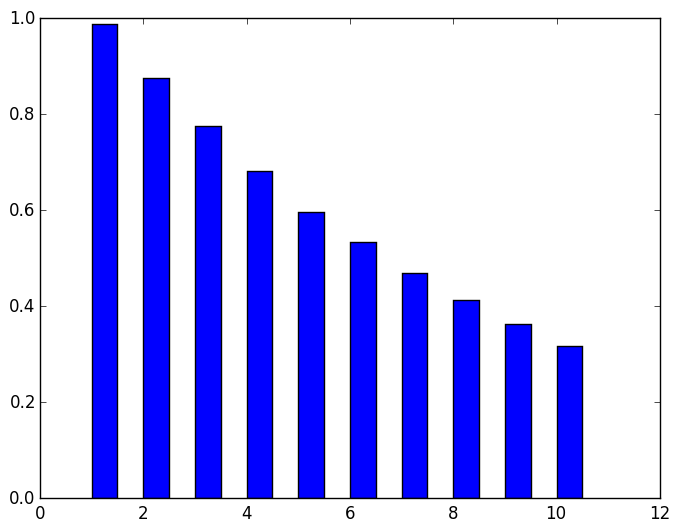

(PyObject <matplotlib.patches.Rectangle object at 0x7f891c85b1d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f891c85b7d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f891c85be50>,PyObject <matplotlib.patches.Rectangle object at 0x7f891c869510>,PyObject <matplotlib.patches.Rectangle object at 0x7f891c869b90>,PyObject <matplotlib.patches.Rectangle object at 0x7f891c875250>,PyObject <matplotlib.patches.Rectangle object at 0x7f891c8758d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f891c875f50>,PyObject <matplotlib.patches.Rectangle object at 0x7f891c882610>,PyObject <matplotlib.patches.Rectangle object at 0x7f891c882c90>)

0.98741,0.87657,0.77607,0.68317,0.59678,0.53378,0.46959,0.41272,0.36329,0.31663]


In [54]:
# ex 5.2.4 (requires 5.2.2)
using Distributions
using PyPlot

const N,u,w = 12,2,1
const S = 1:N+1

function B(x::Int64)
    if x==N/(1+u/w)
        return x
    elseif x>N/(1+u/w)
        return N
    else
        return 0
    end
end

function path(epsilon::Float64,T::Int64,x0::Int64)
    X = zeros(Int64,T)
    X[1] = x0
    d = Bernoulli(epsilon)
    for t in 2:T
        Bx = B(X[t-1])
        X[t] = Bx + sum(rand(d,N-Bx)) - sum(rand(d,Bx))
    end
    return X
end

startd = DiscreteUniform(0,N)
start = rand(startd,1)[1]

data = []
for eps in 0.001:0.01:0.1
    push!(data,mean(path(eps,100000,4).==N))
end
println(data)
fig,ax = subplots()
ax[:bar]([i for i in 1:length(data)],data,width=0.5)

0.25